<p style="font-size: 42px; color: #393e46; font-family: Georgia, serif; text-align: center; background-color: #add8e6; border-radius: 5px 5px;"><strong>Decoding Gestures: Sign Language<br><br>Identification</strong></p>



<p style = "font-size : 30px; color : #03506f ; font-family : 'Times New Roman'; "><strong>Introduction </strong></p> <br>

<br>
In our exploration of sign language identification, we immerse ourselves in the realm of visual communication, where gestures convey profound meanings. With a focus on American Sign Language (ASL), our project utilizes Convolutional Neural Networks (CNNs) to decode the complex hand movements and expressions inherent in sign language. Through this endeavor, we aim to bridge the communication gap between the deaf and hearing communities, fostering inclusivity and accessibility. Join us as we harness the power of technology to unlock the universal language of gestures, promoting seamless communication across linguistic barriers.
<br>

## What are Sign languages ?


<br>
Sign language is visual language that utilizes hand movements, facial expressions, and body postures to convey meaning and emotion. Just as spoken languages vary across regions and cultures, Sign Language also exhibits diversity with distinct grammar, syntax, and vocabulary. American Sign Language (ASL), in particular, is widely used in the United States and Canada.Our project focuses on leveraging Convolutional Neural Networks (CNNs) to decipher ASL gestures.

<p style = "font-size : 30px; color : #03506f ; font-family : 'Times New Roman'; "><strong>Problems Explaination </strong></p> <br>


We are given all the different gasture images considered in ASL (Americal Sign Language) and we need to come up with a machine learning model wich can classifiy the images correctly ,or can tell us the class to which the given image belongs.
Basically we will be building a image classification model . 
<br>

<p style = "font-size : 30px; color : #03506f ; font-family : 'Times New Roman'; "><strong>Data information </strong></p> <br>

<br>
we are given 2 comma saperated file(.csv) each on them contains some rows and 785 columns
* from 2nd columns onwards each column represents the pixel values associated , representing a 28x28 grayscale image
* first column in each row represnts label with the image
* There are total 24 lables (in american sign language) A-I,K-Y means A-Z except J and Z

 In short,in the dataset, each training and test case corresponds to a specific label ranging from 0 to 25. These labels map one-to-one to the alphabetic letters A-Z, excluding the letters J and Z due to gesture motions. So, for example, the label 0 corresponds to the letter A, the label 1 corresponds to the letter B, and so on, until the label 25 corresponds to the letter Y.
 
 we will be using cnn to solve this problem .


## What is an convolution neural network
A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other.
<br>
A Cnn consists of 4 types of nueral layers (collection of 'nodes' operating together at a specific depth within a neural network) .
* **Convolutional Layer** :  Used to detect features
* **Non-Linearity Layer** :  Introducing non-linearity to the system
* **Pooling (Downsampling) Layer** :  Reduces weight count and checks fitness
* **Flattening Layer** :  Prepares data for Classical Neural Network
* **Fully-Connected Layer** :  Standard Neural Network used in classification
I'll not go in depth of each of these layers we will be more focused towards solving this problem,i.e implementation part.

# Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras_tuner import RandomSearch


from keras_tuner.engine.hyperparameters import HyperParameters
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau

from sklearn.metrics import accuracy_score,confusion_matrix
from keras.callbacks import ReduceLROnPlateau


In [19]:
#reading data
train_data = pd.read_csv(r"C:\Users\LENOVO\OneDrive\Desktop\cp2 data/sign_mnist_train.csv")
print(train_data.shape)
train_data.head(11)

(27455, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255
6,8,134,134,135,135,136,137,137,138,138,...,109,102,91,65,138,189,179,181,181,179
7,22,114,42,74,99,104,109,117,127,142,...,214,218,220,223,223,225,227,227,228,228
8,3,169,174,176,180,183,185,187,188,190,...,119,118,123,120,118,114,94,74,61,57
9,3,189,189,189,190,190,191,190,190,190,...,13,53,200,204,201,201,193,175,178,156


In [21]:
test_data = pd.read_csv(r"C:\Users\LENOVO\OneDrive\Desktop\cp2 data/sign_mnist_test.csv")
print(test_data.shape)
test_data.head()

(7172, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


basically in our dataset we are given lable for the corrosponding gasture and 784 (28 x 28) pixel values represting an image <br>
* Training data contains 27455 images 
* test data contains 7172 images 


<p style = "font-size : 30px; color : #03506f ; font-family : 'Times New Roman'; "><strong>Data preprocessing </strong></p> <br>
<br>

* Converting array to images(tensors)

* visulaizing lables and making sure that dataset is balanced

* performing one hot encoding for lables

In [22]:
y_train = train_data['label']
y_test = test_data['label']
del train_data['label']
del test_data['label']

In [23]:
unique_labels = y_train.unique()
unique_labels = np.sort(unique_labels)
unique_labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

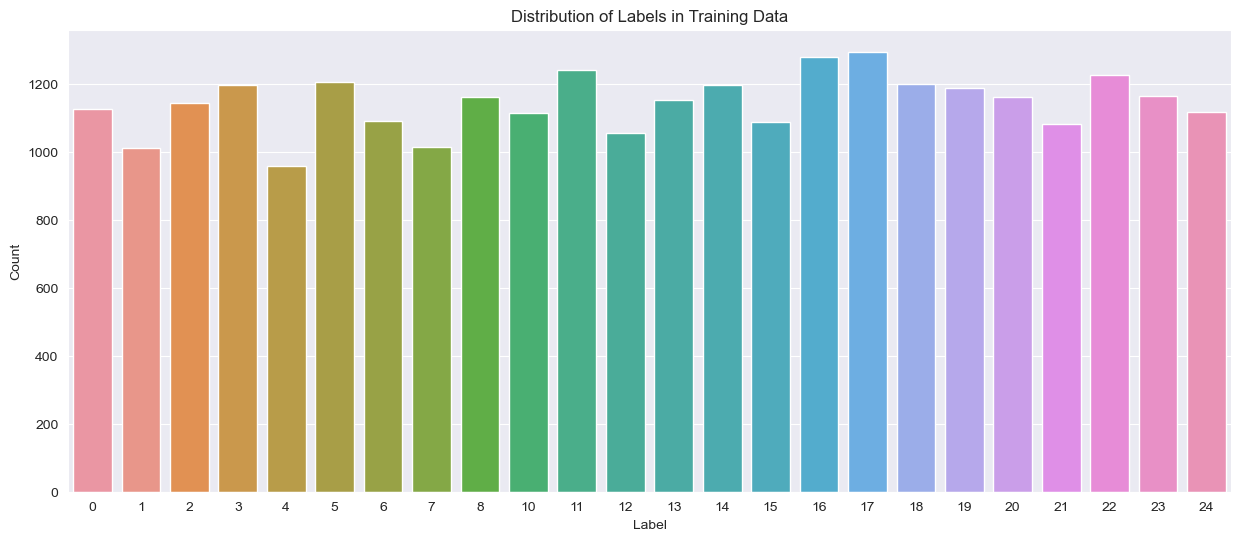

In [26]:
# Aggregate label counts for label 9
label_9_count = y_train[y_train == 9].count()

# Replace all occurrences of label 9 with the aggregated count
label_distribution = y_train.replace(9, label_9_count).value_counts().sort_index()

# Visualize the data
plt.figure(figsize=(15, 6))
sns.set_style("darkgrid")
sns.barplot(x=label_distribution.index, y=label_distribution.values)
plt.title('Distribution of Labels in Training Data')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

This bar plot tells us that there are nearly 1k examples for each class output so we can consider this dataset as a balanced dataset because there's no class suffering from very less or too much examples 



#### convert categorical labels into binary vectors

In [27]:
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

y_train[:2]

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0]])

so basically `LabelBinarizer` performed OHE sort of stuff on our training data .<br>
Now let's write a function wich can take our array of images and can return a well shaped wranggled array .

#### Scaling Pixel Values and Reshaping Images 

In [28]:
def preprocess_image(x):
    
    """
    we know that the pixcel values lies between 0-255 but it is obsearved that models performs exceptionally well if we scale pixel values
    between 0-1"""
    x = x/255
    x = x.reshape(-1,28,28,1) # converting it into 28 x 28 gray scaled image
    
    return x
    

**We perform a grayscale normalization to reduce the effect of illumination's differences.Moreover the CNN converges faster on [0..1] data than on [0..255].**

In [29]:
train_x = preprocess_image(train_data.values)
test_x = preprocess_image(test_data.values)

let's write a function which<br>
* takes images array as input
* displays 10 images from it(first 10)

In [30]:
def show_images(images,labels):
    fig,ax = plt.subplots(2,5)
    fig.set_size_inches(10, 6)
    k =0
    for i in range(2):
        for j in range(5):
            ax[i,j].imshow(images[k] , cmap='gray')
            ax[i,j].set_title(str(unique_labels[np.argmax(y_train[k])]))
            k = k+1;
    plt.tight_layout()

    

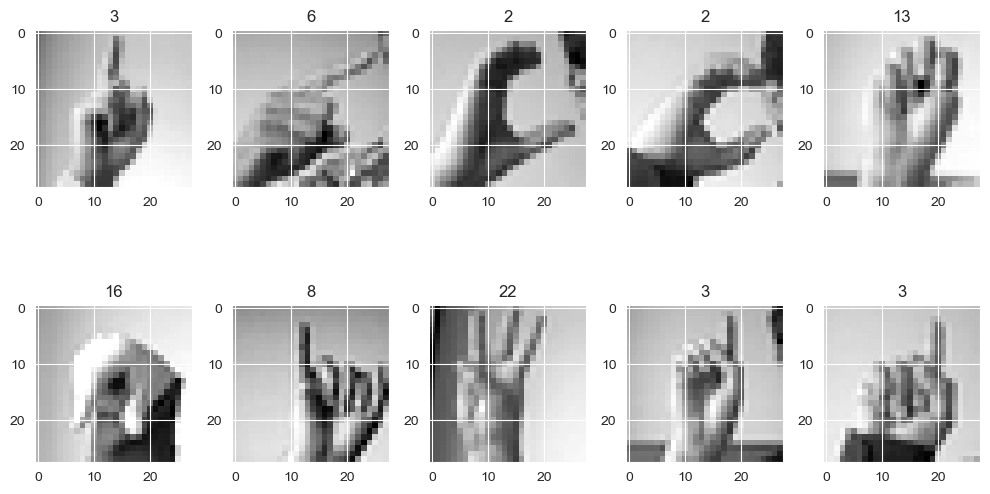

In [31]:
#let's see first 10 images from training set
show_images(train_x,y_train)

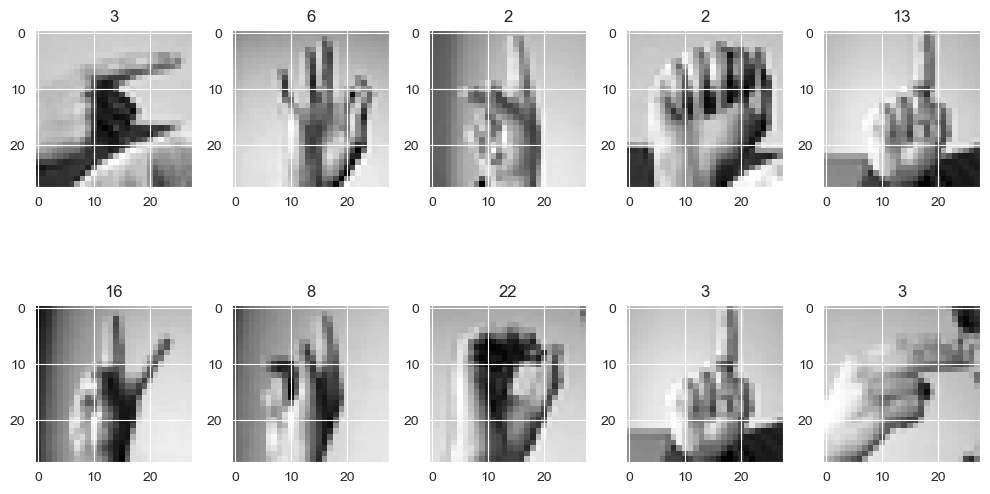

In [32]:
#let's visualize test images as well
show_images(test_x,y_test)

<p style = "font-size : 30px; color : #03506f ; font-family : 'Times New Roman'; "><strong>Data Augmentation </strong></p> <br>


Data augmentation is a strategy that enables practitioners to significantly increase the diversity of data available for training models, without actually collecting new data. Data augmentation techniques such as cropping, padding, and horizontal flipping are commonly used to train large neural networks.

This can expand our dataset artifically and make it robust , that couses variety in data and this can save us from overfitting.

In [33]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(train_x)


<p style = "font-size : 30px; color : #03506f ; font-family : 'Times New Roman'; "><strong>Buidling the CNN model </strong></p> <br>
we will be building a CNN model to classify images , as usual we will try a few of conv2d layers along with batchNormalization and regulization(dropout) and then fallten layer then dense layer .


In [34]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=75, max_value=200, step=25),
        kernel_size=(3,3),
        activation='relu',
        
        input_shape=(28,28,1)
    ),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2),strides=2,padding='same'),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=50, max_value=125, step=25),
        kernel_size=(3,3),
        activation='relu',
    ),
    
    keras.layers.Dropout(
        rate = hp.Choice('drop_1_rate', values = [0.1,0.5])
    ),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2),strides=2,padding='same'),
    
    
    keras.layers.Conv2D(
        filters=hp.Int('conv_3_filter', min_value=25, max_value=75, step=25),
        kernel_size=(3,3),
        activation='relu',
    ),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2),strides=2,padding='same'),  
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=128, max_value=1024, step=32),
        activation='relu'
    ),
    keras.layers.Dropout(
        rate = hp.Choice('drop_2_rate', values = [0.1,0.3])
    ),
    keras.layers.Dense(24, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [35]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="ASLdetection1")

C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
tuner_search.search(train_x,y_train,epochs=5,validation_data = (test_x, y_test))

Trial 5 Complete [00h 09m 01s]
val_accuracy: 0.8457891941070557

Best val_accuracy So Far: 0.9668154120445251
Total elapsed time: 00h 47m 18s



<br>
In the function `build_model` we build a cnn model , we spacified some layers and some of the hyperparameters are tuned using `keras-tuner` , it took each possible set of allowed parameters and trained a model and validated on test data.


 we have tried different models and it's time to extract the best model from `tuner_search` object.

In [39]:
model=tuner_search.get_best_models(num_models=1)[0] #this will give us the best tuned model

C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 34 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


# Create a callback 
A callback is a set of functions to be applied at given stages of the training procedure. You can use callbacks to get a view on internal states and statistics of the model during training.

we will reduce learning rate when a metric has stopped improving.

Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.


In [41]:
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 3, verbose=1,factor=0.5, min_lr=0.00001)

now let's train the model 

In [42]:
history = model.fit(datagen.flow(train_x,y_train, batch_size = 128) 
                    ,epochs = 20
                    , validation_data = (test_x, y_test)
                    , callbacks = [lr_reduction])

Epoch 1/20


C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


215/215 ━━━━━━━━━━━━━━━━━━━━ 123s 554ms/step - accuracy: 0.8997 - loss: 0.3777 - val_accuracy: 0.9720 - val_loss: 0.0983 - learning_rate: 0.0010
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 113s 523ms/step - accuracy: 0.9660 - loss: 0.1038 - val_accuracy: 0.9233 - val_loss: 0.2271 - learning_rate: 0.0010
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 113s 524ms/step - accuracy: 0.9808 - loss: 0.0602 - val_accuracy: 0.9562 - val_loss: 0.1169 - learning_rate: 0.0010
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 122s 563ms/step - accuracy: 0.9842 - loss: 0.0474 - val_accuracy: 0.9872 - val_loss: 0.0412 - learning_rate: 0.0010
Epoch 5/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 133s 610ms/step - accuracy: 0.9882 - loss: 0.0366 - val_accuracy: 0.9940 - val_loss: 0.0156 - learning_rate: 0.0010
Epoch 6/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 118s 543ms/step - accuracy: 0.9892 - loss: 0.0305 - val_accuracy: 0.9741 - val_loss: 0.0922 - learning_rate: 0.0010
Epoch 7/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 126s 582ms/step - accuracy: 0.9913 

 we got 99% accuracy on our test data .
# Analyse the trained model

In [43]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 125)    │         1,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 125)    │           500 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 125)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 125)    │       140,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11, 11, 125)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 125)    │           500 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 125)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 50)       │        56,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 50)       │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 50)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 384)            │        77,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │         9,240 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 856,574 (3.27 MB)

 Trainable params: 285,324 (1.09 MB)

 Non-trainable params: 600 (2.34 KB)

 Optimizer params: 570,650 (2.18 MB)

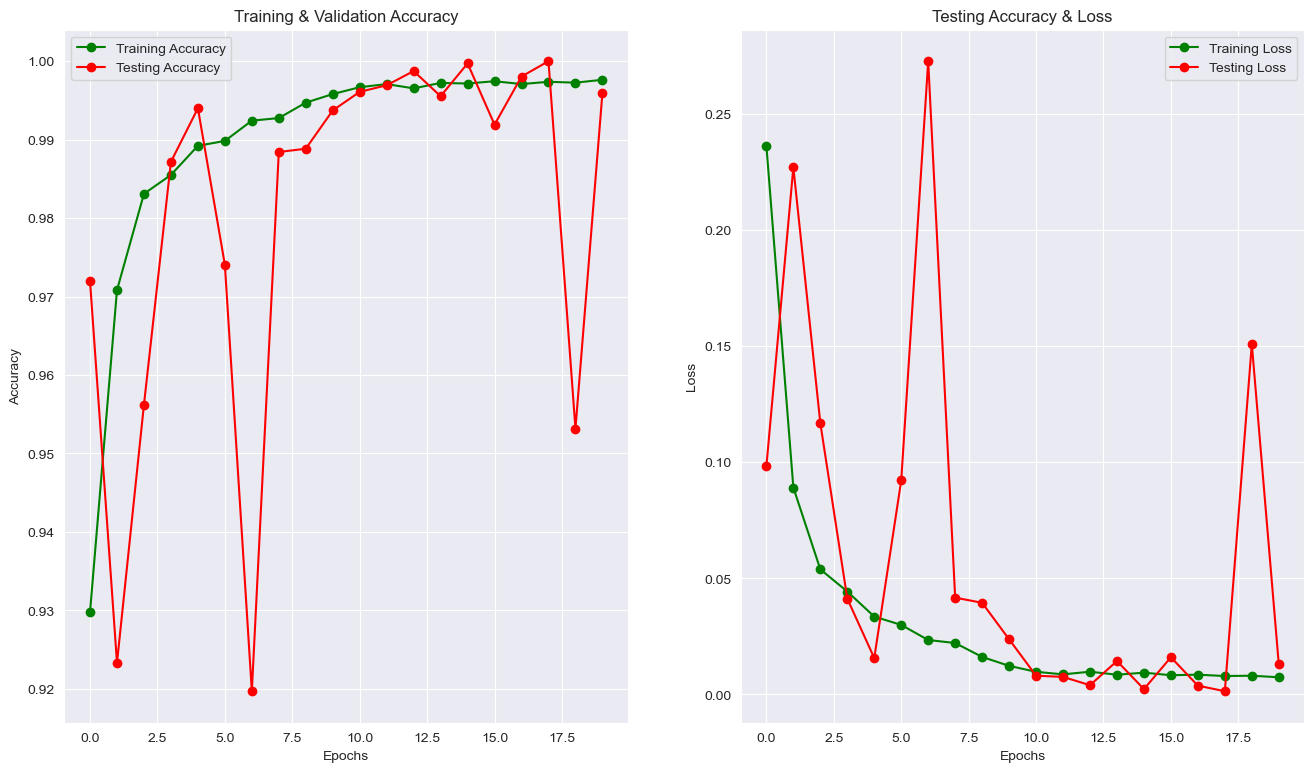

In [44]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

<p style = "font-size : 30px; color : #03506f ; font-family : 'Times New Roman'; "><strong>Model architecture </strong></p> <br>

let's now plot the model architecture

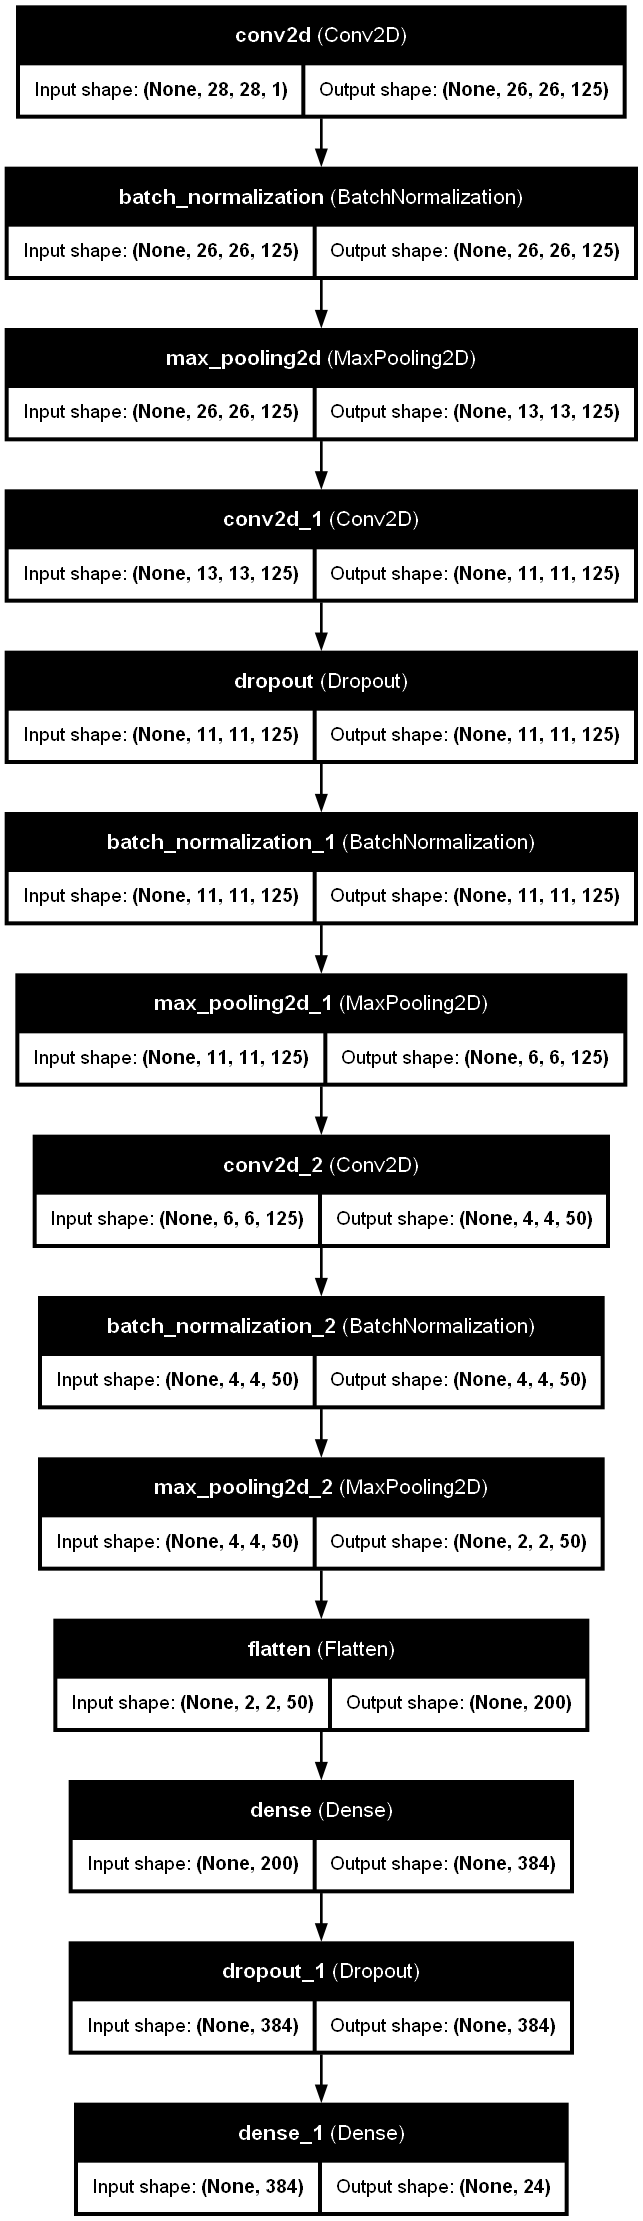

In [45]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

<p style = "font-size : 30px; color : #03506f ; font-family : 'Times New Roman'; "><strong>Evaluation </strong></p> <br>

Now let's make some predictions on test data and see the confusion metrix

In [46]:
predictions = model.predict(test_x)

225/225 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step


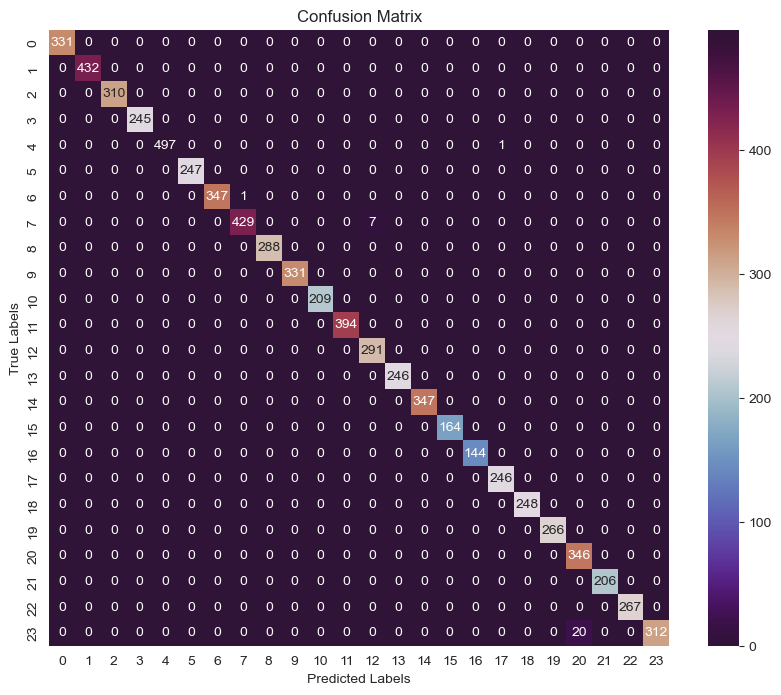

Accuracy: 0.9959564974902398
Precision: 0.9961304267707318
Recall: 0.9959564974902398
F1 Score: 0.9959542686044874


In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to convert model predictions to labels
def predictions_to_labels(pred, unique_labels):
    labels = []
    for p in pred:
        labels.append(unique_labels[np.argmax(p)])
    return labels

# Calculate accuracy
accuracy = accuracy_score(y_test_labels, y_pred_labels)

# Calculate precision
precision = precision_score(y_test_labels, y_pred_labels, average='weighted')

# Calculate recall
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')

# Calculate F1 score
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')

# Confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='twilight_shifted', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


<p style = "font-size : 30px; color : #03506f ; font-family : 'Times New Roman'; "><strong>summary</strong></p> <br>

 * we took the data from the dataframes and preprocessed the images
 * we performed data augmentation
 * we creadted a cnn model and tuned the hyperparameters with the help of `keras-tuner` library
 * we analysed our model
 <br>
 * At the end me made prediction of test data and as you can see we got the accuracy of <strong>99%</strong></p> 
<br>


<p style = "font-size : 30px; color : #03506f ; font-family : 'Times New Roman'; "><strong>way forward</strong></p> <br>

 * Targeted Analysis: Conduct demographic-specific studies to refine the CNN model's performance across different user groups
 * Tailored Model Refinement: Optimize the CNN architecture based on demographic insights to ensure accurate sign language recognition
 *  Enhanced Data Augmentation: Expand data augmentation techniques to improve model robustness against various hand gestures and backgrounds.
 * Deployment and User Support:
*   Provide user-friendly interfaces and accessibility features to facilitate seamless integration of the CNN model into assistive technologies and communication platforms.
*  Offer ongoing training and support resources for users and developers to maximize the impact and accessibility of the sign language recognition system.
 <br>

<p style = "font-size : 30px; color : #03506f ; font-family : 'Times New Roman'; "><strong>Applications </strong></p> <br>  

* Assistive Technology: Integration into devices and applications to facilitate real-time translation of ASL gestures into text or spoken language, enabling seamless communication for deaf and hard-of-hearing individuals.

* Education: Incorporation into educational platforms and tools for interactive learning of ASL, providing personalized feedback and guidance to learners.

* Accessibility Tools: Integration into social media platforms, video conferencing software, and public displays to make content accessible to deaf users through automatic captioning or sign language interpretation.

* Healthcare: Deployment in telemedicine platforms to enable effective communication between deaf patients and healthcare providers, ensuring accessibility to medical information and services.

* Smart Assistants: Integration into smart home devices and virtual assistants to recognize ASL commands, enhancing accessibility and usability for users with hearing impairments.

<p style = "font-size : 30px; color : #03506f ; font-family : 'Times New Roman'; "><strong>Conclusion </strong></p> <br>
Our CNN project on ASL gesture recognition has achieved a notable 99% accuracy, showcasing the potential of deep learning in bridging communication barriers. Moving forward, exploring advanced techniques and collaborating with stakeholders will enhance inclusivity and accessibility in real-world applications. This project highlights the transformative impact of technology in promoting communication for all.